<a href="https://colab.research.google.com/github/shub0411/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from scipy import stats
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt


In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cardio_df=pd.read_csv('/content/drive/MyDrive/capstone project 3/data_cardiovascular_risk.csv', encoding ='latin')

In [4]:
cardio_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
cardio_df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [6]:
cardio_df.columns


Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [7]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [8]:
cardio_df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
(cardio_df.shape)

(3390, 17)

In [10]:
cardio_df.isna().sum()
cardio_df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [11]:
cardio_df['sex'] = cardio_df['sex'].replace({'F':1,'M':0})
cardio_df['is_smoking'] = cardio_df['is_smoking'].replace({'YES':1,'NO':0})

In [12]:
cardio_df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [13]:
cardio_df.drop(['id'],axis=1,inplace=True)

In [14]:
def mode_fillna(df , columns):
  ''' Null values of categorical columns are filled with the mode of the column'''
  for column in columns:
    df[column] = df[column].fillna(df[column].mode()[0])

In [15]:
mode_fillna(df = cardio_df, columns = ['education','BPMeds'])

In [16]:
def median_fillna(df, columns):
  ''' Null values of continous columns are filled with the median of the column '''
  for column in columns:
    df[column] = df[column].fillna(df[column].median())

In [17]:
median_fillna(df = cardio_df, columns = ['cigsPerDay','totChol','BMI','heartRate','glucose'])

In [18]:
cardio_df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [19]:
cardio_df.describe(include = 'all')

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,49.542183,1.946018,0.567257,0.497640,9.010619,0.029499,0.006490,0.315339,0.025664,237.039823,132.60118,82.883038,25.793251,75.976991,81.720059,0.150737
std,8.592878,1.017568,0.495529,0.500068,11.862839,0.169224,0.080309,0.464719,0.158153,44.994205,22.29203,12.023581,4.107026,11.970114,23.161265,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,72.000000,0.000000
50%,49.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,85.000000,0.000000
max,70.000000,4.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


# **EDA**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


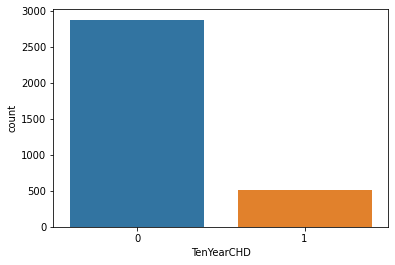

In [20]:
sns.countplot(cardio_df['TenYearCHD'])

In [21]:
categorical_columns = ['sex','is_smoking','education','BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes']
numerical_columns = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

In [22]:
cardio_df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [23]:
cardio_df['prevalentStroke'].value_counts()

0    3368
1      22
Name: prevalentStroke, dtype: int64

In [24]:
cardio_df['prevalentHyp'].value_counts()

0    2321
1    1069
Name: prevalentHyp, dtype: int64

In [25]:
cardio_df['diabetes'].value_counts()

0    3303
1      87
Name: diabetes, dtype: int64

In [26]:
cardio_df['BMI'].value_counts()

25.38    24
22.91    17
22.54    16
22.19    15
23.48    12
         ..
39.04     1
26.66     1
29.55     1
35.58     1
31.09     1
Name: BMI, Length: 1259, dtype: int64

In [27]:
cardio_df['diaBP'].value_counts()

80.0     213
82.0     123
70.0     109
85.0     107
90.0     100
        ... 
48.0       1
60.5       1
129.0      1
115.5      1
51.0       1
Name: diaBP, Length: 142, dtype: int64

In [28]:
cardio_df['sysBP'].value_counts()

110.0    87
120.0    85
130.0    85
125.0    69
115.0    68
         ..
214.0     1
188.5     1
230.0     1
169.5     1
85.5      1
Name: sysBP, Length: 226, dtype: int64

In [29]:
cardio_df['cigsPerDay'].value_counts()

0.0     1725
20.0     606
30.0     176
15.0     172
10.0     106
9.0      104
5.0      103
3.0       79
40.0      62
1.0       48
25.0      44
43.0      42
35.0      17
2.0       17
6.0       14
8.0       10
7.0        8
60.0       8
18.0       7
4.0        7
50.0       6
17.0       5
23.0       5
11.0       4
12.0       3
13.0       3
19.0       2
16.0       2
45.0       2
14.0       1
70.0       1
38.0       1
Name: cigsPerDay, dtype: int64

In [30]:
cardio_df['BPMeds'].value_counts()

0.0    3290
1.0     100
Name: BPMeds, dtype: int64

In [31]:
cardio_df['BMI'].value_counts()

25.38    24
22.91    17
22.54    16
22.19    15
23.48    12
         ..
39.04     1
26.66     1
29.55     1
35.58     1
31.09     1
Name: BMI, Length: 1259, dtype: int64

In [32]:
cardio_df['totChol'].value_counts()

234.0    69
240.0    65
210.0    51
220.0    48
260.0    46
         ..
137.0     1
113.0     1
392.0     1
353.0     1
364.0     1
Name: totChol, Length: 240, dtype: int64

In [33]:
cardio_df['heartRate'].value_counts()

75.0     443
80.0     298
70.0     241
85.0     191
72.0     184
        ... 
47.0       1
143.0      1
51.0       1
140.0      1
97.0       1
Name: heartRate, Length: 68, dtype: int64

In [34]:
cardio_df['glucose'].value_counts()

78.0     421
75.0     149
83.0     135
70.0     123
77.0     122
        ... 
191.0      1
119.0      1
43.0       1
256.0      1
274.0      1
Name: glucose, Length: 132, dtype: int64

In [35]:
cardio_df['diabetes'].value_counts()

0    3303
1      87
Name: diabetes, dtype: int64

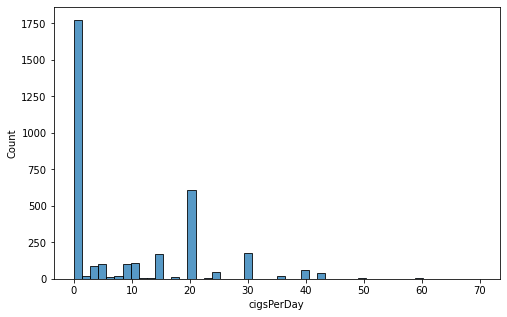

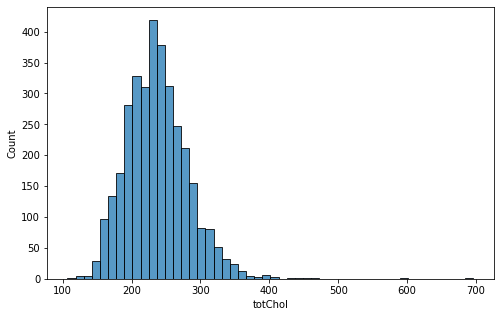

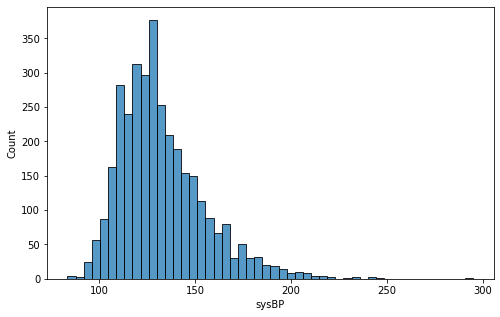

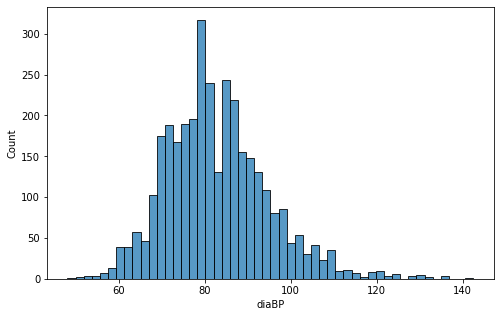

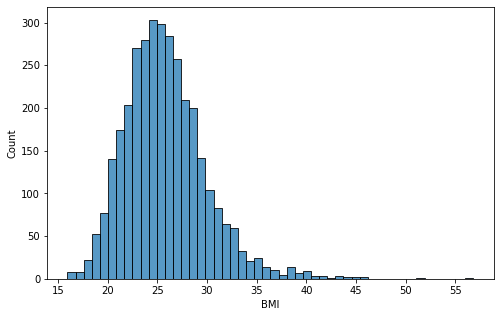

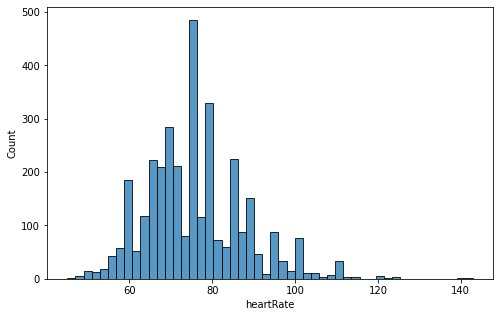

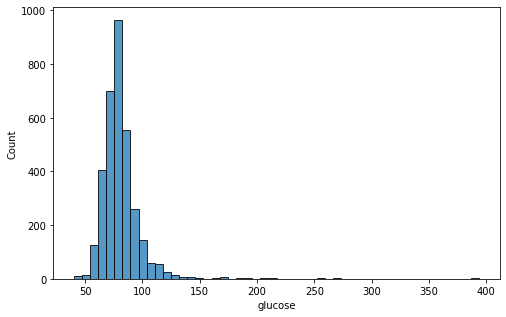

In [60]:
cts_features = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
for col in cts_features[1:]:
  plt.figure(figsize = (8,5))
  sns.histplot(cardio_df[col], bins = 50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


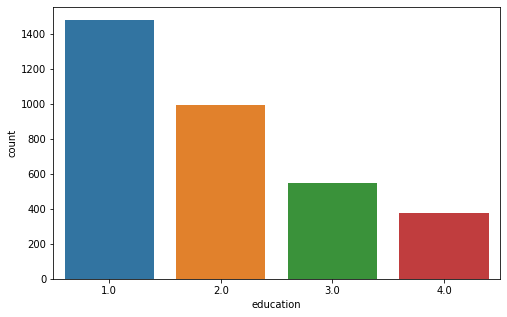

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


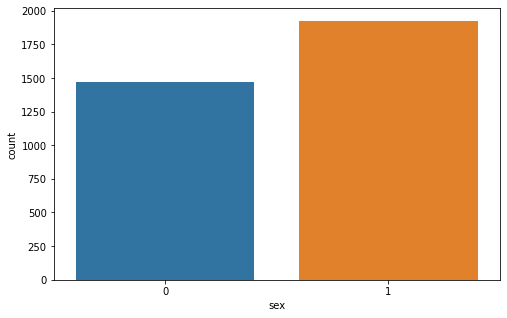

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


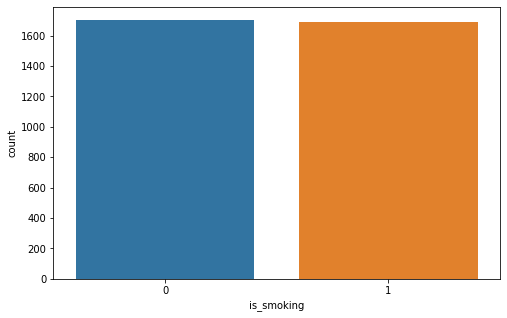

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


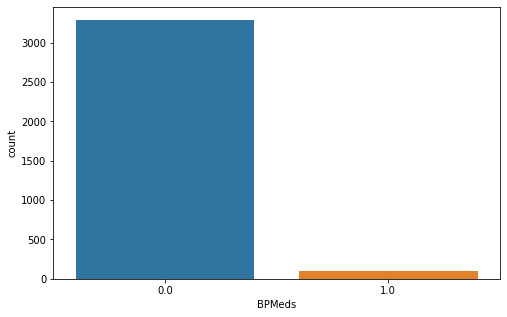

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


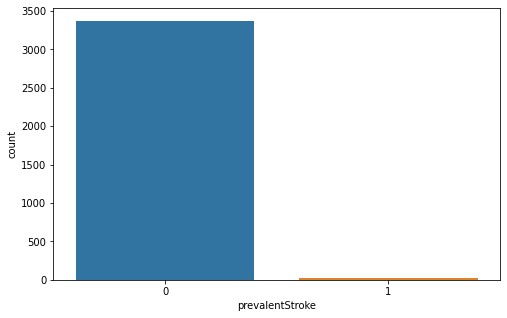

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


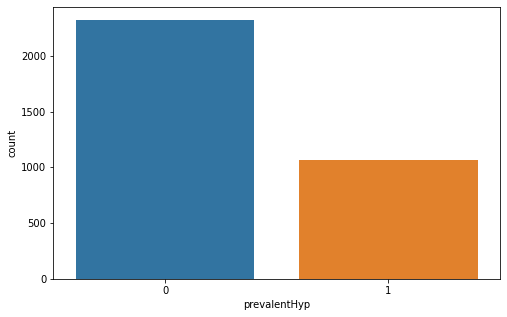

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


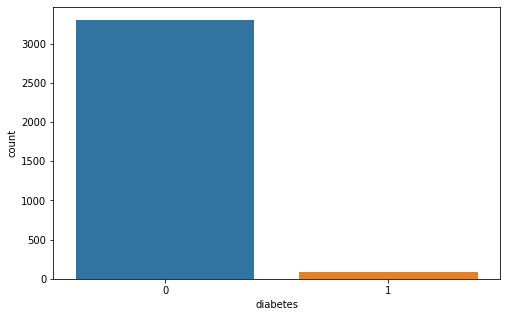

In [43]:
cat_features = ['education','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes']
for col in cat_features:
  plt.figure(figsize = (8,5))
  sns.countplot(cardio_df[col])
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


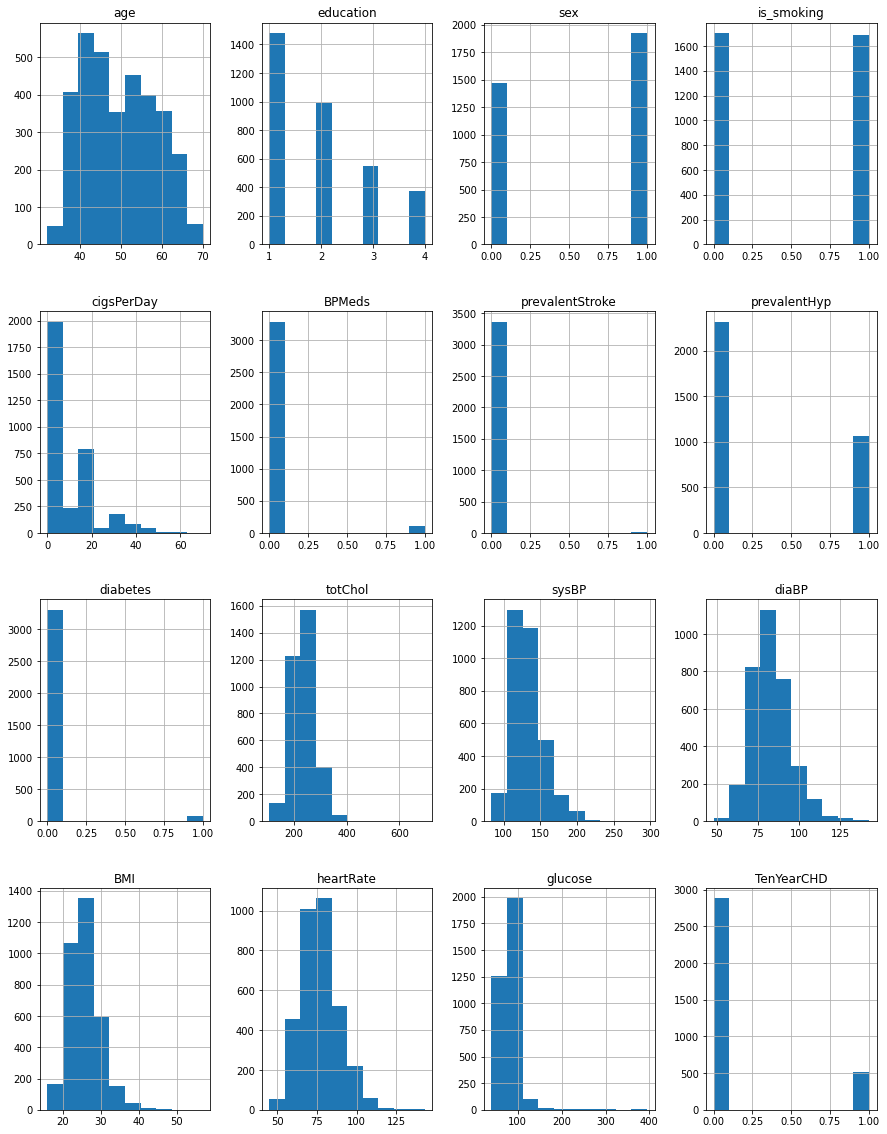

In [49]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
cardio_df.hist(ax = ax)
plt.show()

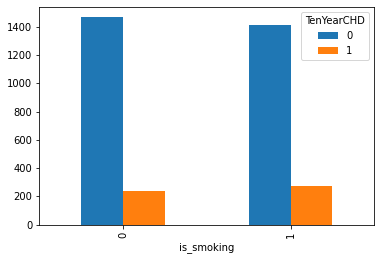

In [50]:
pd.crosstab(cardio_df['is_smoking'],cardio_df['TenYearCHD']).plot(kind='bar')

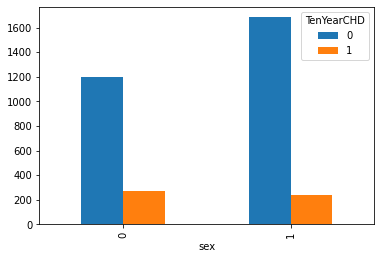

In [51]:
pd.crosstab(cardio_df['sex'],cardio_df['TenYearCHD']).plot(kind='bar')

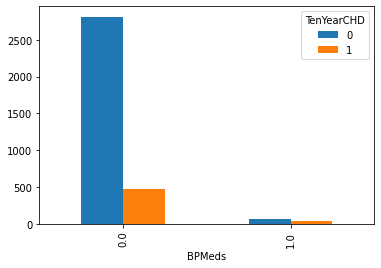

In [52]:
pd.crosstab(cardio_df['BPMeds'],cardio_df['TenYearCHD']).plot(kind='bar')

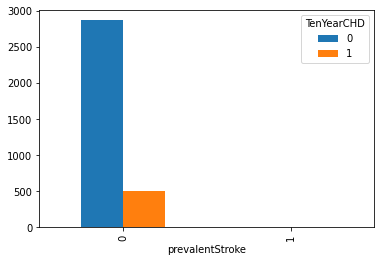

In [53]:
pd.crosstab(cardio_df['prevalentStroke'],cardio_df['TenYearCHD']).plot(kind='bar')

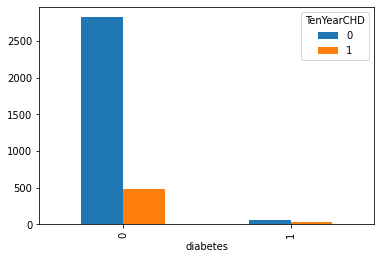

In [54]:
pd.crosstab(cardio_df['diabetes'],cardio_df['TenYearCHD']).plot(kind='bar')

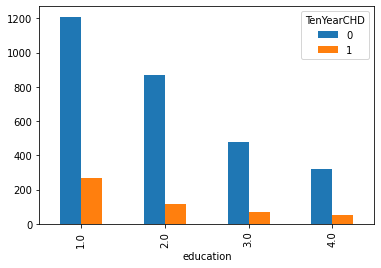

In [55]:
pd.crosstab(cardio_df['education'],cardio_df['TenYearCHD']).plot(kind='bar')

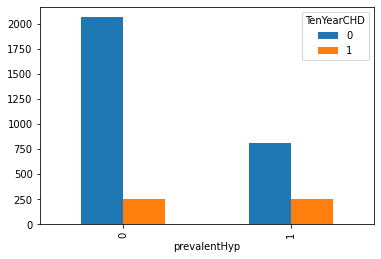

In [56]:
pd.crosstab(cardio_df['prevalentHyp'],cardio_df['TenYearCHD']).plot(kind='bar')

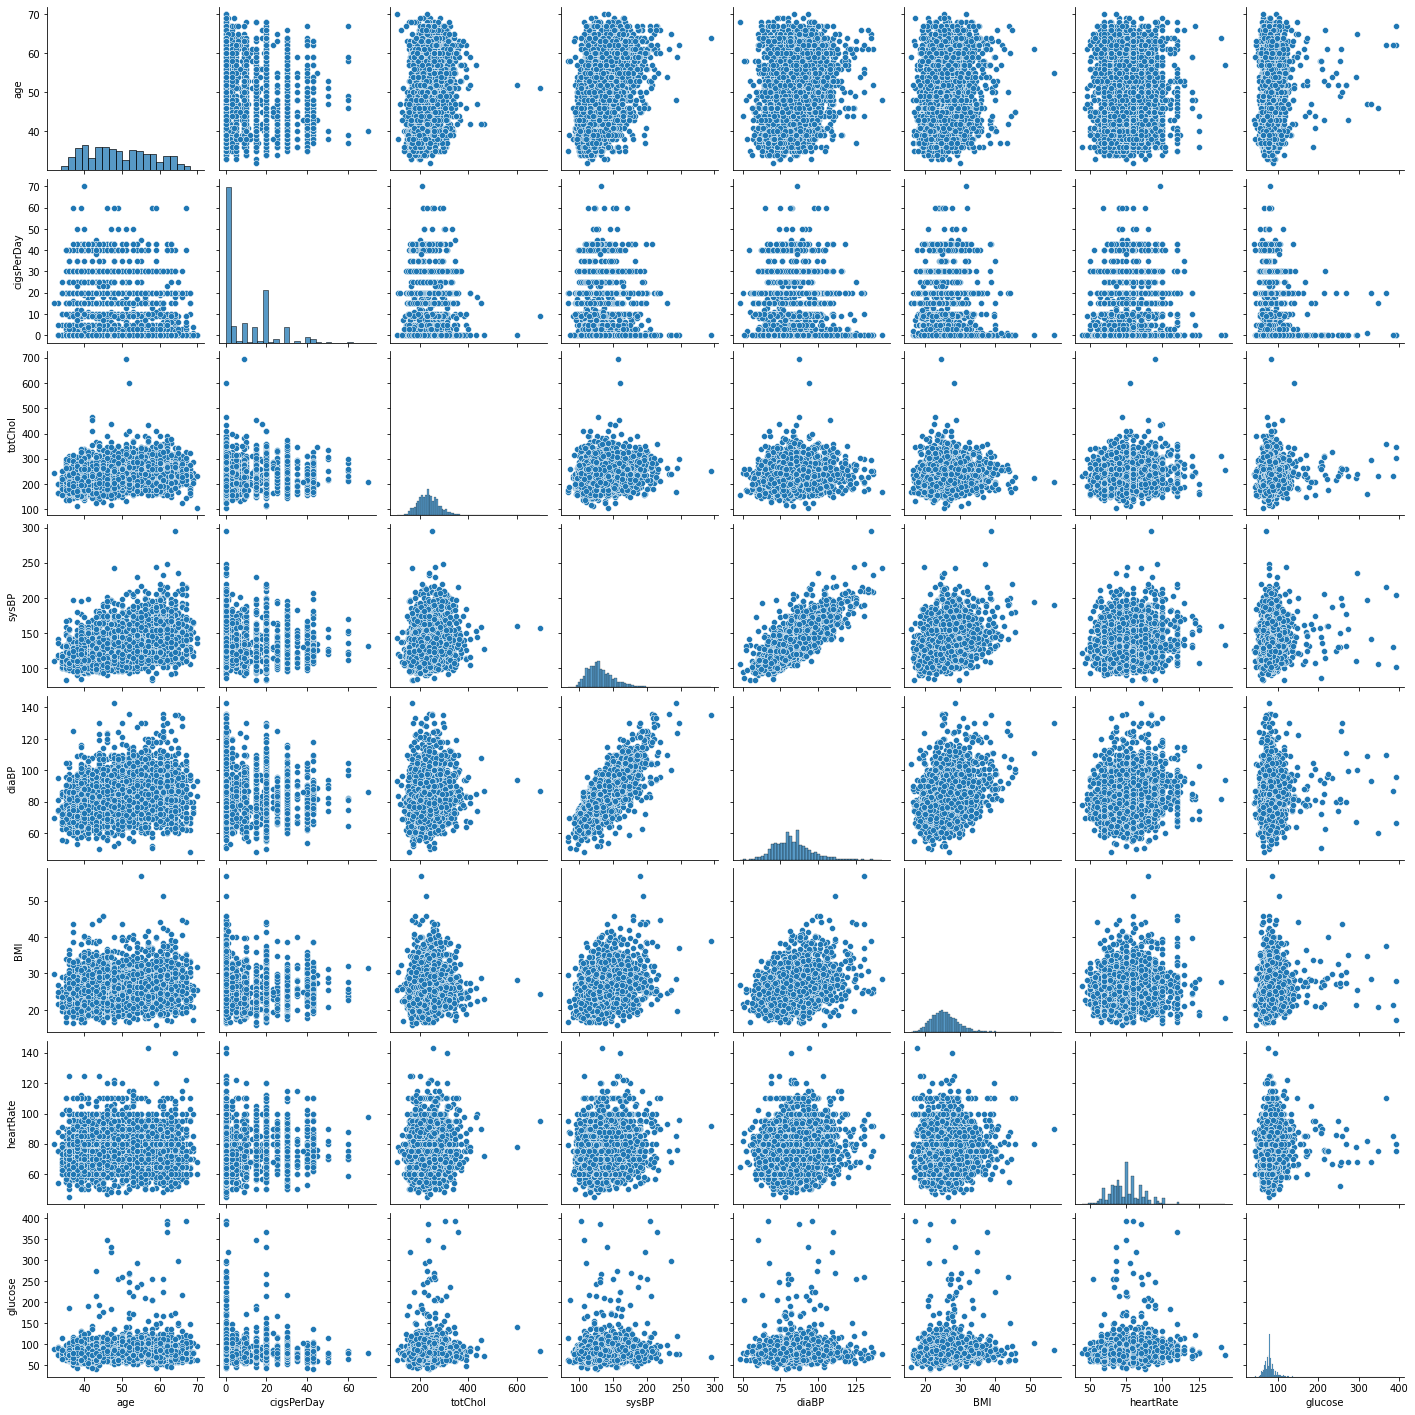

In [61]:
sns.pairplot(cardio_df[cts_features])
plt.show()

In [62]:
independent_variables = ['age','education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']
dependent_variables = ['TenYearCHD']

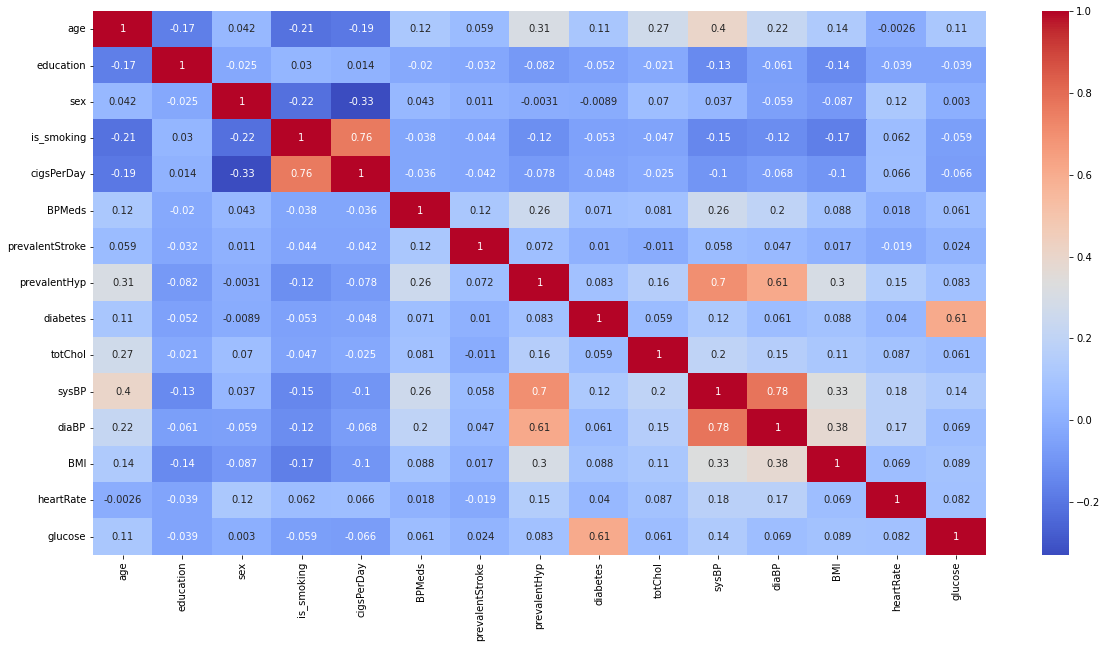

In [63]:
correlation_calc = cardio_df[independent_variables].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_calc,  annot=True, cmap="coolwarm")

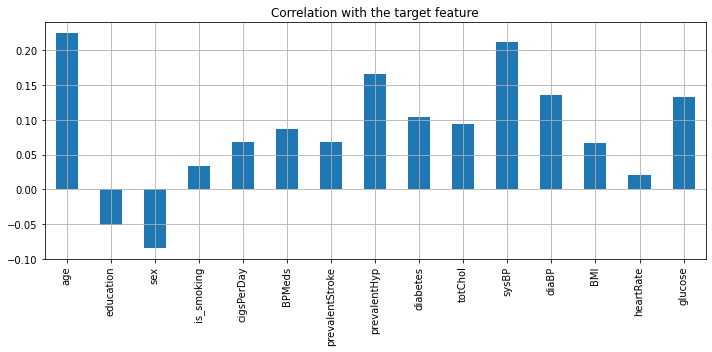

In [65]:
cardio_df.drop(dep_variable, axis=1).corrwith(cardio_df[dep_variable]).plot(kind='bar', grid=True, figsize=(10, 5), 
                                                        title="Correlation with the target feature")
plt.tight_layout()

In [67]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from sklearn.impute import KNNImputer

%matplotlib inline
import seaborn as sns
from scipy import stats
from datetime import datetime
import datetime as dt

In [68]:
y = cardio_df[dep_variable]                       # target variable
x = cardio_df.drop(columns = [dep_variable])      # independent features
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [70]:
x_train.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2134,54,1.0,1,0,0.0,0.0,0,0,0,272.0,146.0,95.0,23.66,72.0,80.0
1161,37,2.0,0,1,9.0,0.0,0,0,0,237.0,102.0,72.0,19.68,67.0,83.0
137,39,1.0,0,1,43.0,0.0,0,1,0,291.0,177.5,100.0,25.74,67.0,91.0
2170,55,1.0,1,0,0.0,0.0,0,0,0,225.0,136.5,85.5,20.56,60.0,90.0
2876,59,2.0,0,0,0.0,0.0,0,0,0,237.0,131.5,84.0,24.17,90.0,94.0


In [71]:
y_train.head()

2134    0
1161    0
137     0
2170    0
2876    1
Name: TenYearCHD, dtype: int64

In [72]:
x_test.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
1296,64,4.0,1,1,9.0,0.0,0,0,0,342.0,128.0,71.0,20.52,60.0,62.0
663,61,4.0,0,1,10.0,0.0,0,0,0,258.0,130.0,70.0,24.35,67.0,78.0
648,58,1.0,0,0,0.0,0.0,0,1,0,333.0,139.0,96.0,28.38,75.0,78.0
2715,46,1.0,0,0,0.0,0.0,0,1,0,235.0,136.5,92.0,22.92,68.0,89.0
1678,65,1.0,1,0,0.0,0.0,0,1,0,245.0,171.0,89.0,23.07,82.0,93.0


In [73]:
y_test.head()

1296    0
663     0
648     0
2715    0
1678    0
Name: TenYearCHD, dtype: int64

In [74]:
x_train.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
dtype: int64

In [75]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2712, 15)
(2712,)
(678, 15)
(678,)


In [76]:
train_independent = x_train
train_dependent = y_train

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [81]:
models = {'Logistic Regression' : LogisticRegression(),
              'Random Forest' : RandomForestClassifier(),
              'XGB Classifier' : XGBClassifier(),
              'KNN' : KNeighborsClassifier(),
              'SVC' : SVC(probability=True)}

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

In [84]:
def model_build(x_train, y_train, x_test, y_test, model_dict):
  ''' Returns a dataframe with model name and accuracy scores, train confusion matrix, test confusion matrix and the values 
  for the roc curve '''
  

  model_df = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC'])
  
  train_confusion_matrix = {}  
  test_confusion_matrix = {}  
  curve = {}
  
  

  for n, m in model_dict.items():
    model = m
    model.fit(x_train, y_train)
    train_preds = model.predict(x_train)
    test_preds = model.predict(x_test)

    test_probs = model.predict_proba(x_test)
    test_probs = test_probs[:,1]



    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    train_precision = precision_score(y_train, train_preds)
    test_precision = precision_score(y_test, test_preds)
    train_recall = recall_score(y_train, train_preds)
    test_recall = recall_score(y_test, test_preds)
    train_roc_auc = roc_auc_score(y_train, train_preds)
    test_roc_auc = roc_auc_score(y_test, test_preds)

    # Updating the dataframe for each iteration
    model_df = model_df.append({'Model': n,
                               'Train Accuracy' : train_accuracy,
                               'Test Accuracy': test_accuracy,
                               'Train Precision' : train_precision,
                               'Test Precision' : test_precision,
                               'Train Recall' : train_recall,
                               'Test Recall' : test_recall,
                               'Train ROC AUC' : train_roc_auc,
                               'Test ROC AUC' : test_roc_auc}, ignore_index = True)
    
    # Updating the dictionary for each iteration
    train_confusion_matrix[n] = confusion_matrix(y_train, train_preds)
    test_confusion_matrix[n] = confusion_matrix(y_test, test_preds)

    # ROC Curve values
    fpr, tpr, _ = roc_curve(y_test, test_probs)
    curve[n] = (fpr,tpr)

    

  return model_df, train_confusion_matrix, test_confusion_matrix, curve

In [86]:
model_table, train_cm, test_cm, curve= model_build(x_train, y_train, x_test, y_test, models)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
model_table

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC AUC,Test ROC AUC
0,Logistic Regression,0.856932,0.840708,0.750000,1.000000,0.0450,0.027027,0.521202,0.513514
1,Random Forest,1.000000,0.840708,1.000000,0.571429,1.0000,0.108108,1.000000,0.546118
2,XGB Classifier,0.877212,0.842183,0.924051,0.583333,0.1825,0.126126,0.589952,0.554245
3,KNN,0.871313,0.828909,0.694656,0.380952,0.2275,0.072072,0.605099,0.524572
4,SVC,0.853982,0.836283,0.833333,0.000000,0.0125,0.000000,0.506034,0.500000


In [88]:
for name, matrix in train_cm.items():
  print(f'Model : {name}')
  print(matrix)
  print('**'*10)

Model : Logistic Regression
[[2306    6]
 [ 382   18]]
********************
Model : Random Forest
[[2312    0]
 [   0  400]]
********************
Model : XGB Classifier
[[2306    6]
 [ 327   73]]
********************
Model : KNN
[[2272   40]
 [ 309   91]]
********************
Model : SVC
[[2311    1]
 [ 395    5]]
********************


In [89]:
for name, matrix in test_cm.items():
  print(f'Model : {name}')
  print(matrix)
  print('**'*10)

Model : Logistic Regression
[[567   0]
 [108   3]]
********************
Model : Random Forest
[[558   9]
 [ 99  12]]
********************
Model : XGB Classifier
[[557  10]
 [ 97  14]]
********************
Model : KNN
[[554  13]
 [103   8]]
********************
Model : SVC
[[567   0]
 [111   0]]
********************


# Decision Tree Classifier

In [91]:
train_independent = x_train
train_dependent = y_train

In [92]:
from sklearn.tree import DecisionTreeClassifier
  
# create a regressor object
classifier= DecisionTreeClassifier(random_state = 0) 
  
# fit the regressor with X and Y data
classifier.fit(train_independent, train_dependent)

DecisionTreeClassifier(random_state=0)

In [93]:
y_pred = classifier.predict(x_test[independent_variables])
accuracy_score(train_dependent, classifier.predict(train_independent))

1.0

In [96]:
train,test=train_test_split(cardio_df,test_size=0.2,random_state=0, stratify=cardio_df['TenYearCHD'])

In [97]:
print(train.shape)
print(test.shape)

(2712, 16)
(678, 16)


In [98]:
y_pred = classifier.predict(test[independent_variables])
accuracy_score(train_dependent, classifier.predict(train_independent))

1.0

In [99]:
accuracy_score(test[dependent_variables], classifier.predict(test[independent_variables]))

0.9513274336283186

In [100]:
from sklearn.metrics import recall_score
recall_score(train_dependent, classifier.predict(train_independent))

1.0

In [101]:
recall_score(test[dependent_variables], classifier.predict(test[independent_variables]))

0.8823529411764706

In [102]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train=scaler.fit_transform(train_independent)
X_test=scaler.fit_transform(test[independent_variables])

In [104]:
classifier= DecisionTreeClassifier(random_state = 0) 
classifier.fit(X_train, train_dependent)

DecisionTreeClassifier(random_state=0)

In [105]:
recall_score(train_dependent, classifier.predict(X_train))

1.0

In [106]:
recall_score(test[dependent_variables], classifier.predict(X_test))

0.6764705882352942

In [107]:
classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

Feature: 0, Score: 0.13980
Feature: 1, Score: 0.01932
Feature: 2, Score: 0.02319
Feature: 3, Score: 0.00459
Feature: 4, Score: 0.04255
Feature: 5, Score: 0.00442
Feature: 6, Score: 0.00479
Feature: 7, Score: 0.01090
Feature: 8, Score: 0.00564
Feature: 9, Score: 0.13373
Feature: 10, Score: 0.10879
Feature: 11, Score: 0.10514
Feature: 12, Score: 0.15883
Feature: 13, Score: 0.10604
Feature: 14, Score: 0.13227


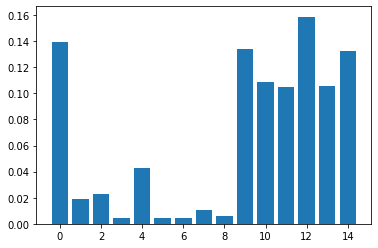

In [108]:
importance = classifier.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [109]:
grid = {"max_depth": [16,17,18],"criterion": ["gini",'entropy'],"min_samples_split":[2,3,4]}

grid = GridSearchCV(classifier, grid, refit = True, verbose = 3, cv=3)
grid.fit(x_train, train_dependent)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END criterion=gini, max_depth=16, min_samples_split=2;, score=0.764 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, min_samples_split=2;, score=0.769 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, min_samples_split=2;, score=0.778 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, min_samples_split=3;, score=0.765 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, min_samples_split=3;, score=0.764 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, min_samples_split=3;, score=0.765 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, min_samples_split=4;, score=0.769 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, min_samples_split=4;, score=0.763 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, min_samples_split=4;, score=0.775 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=17, min_samples_split=2;, score=0.75

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [16, 17, 18],
                         'min_samples_split': [2, 3, 4]},
             verbose=3)